This program is a continuation of the employee mapping program (emp_map.ipynb). I made some adjustments to it: added more entries to the csv and created a function to handle the incrementing the values, rather than hard coding.

Just for reference, the original program set out to take in a csv containing individual's names, city, state, latitude, and longitude data and plot their locations using plotly.express. The inspiration behind this program came about because I was in charge of spearheading an employee mapping program at my job and I wanted to use plotly.express to achieve this. Here's the problem: plotly does not allow multiple points for the same coordinates. Thus, if we have five (5) people that live in Durham, NC, if the latitude and longitude coordinates are the same, plotly will only show one (1) point for that location. My program will identify duplicate values, slightly increment the longitude value, and put it back into the orginal dataframe so that all people from the same city will show on the map, rather than just one.

In [2]:
import csv
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [3]:
csv_list = []
with open('employees.csv','r') as f:
    file = csv.reader(f)
    for line in file:
        csv_list.append(line)

In [4]:
data = csv_list[1:]

In [5]:
#data

In [8]:
employee = pd.DataFrame(data,columns=['Name', 'City','State','Lat','Lon'])

In [9]:
employee

Name          City State                 Lat  \
0    Janet Robertson  Philadelphia    PA   39.95239418609630   
1          Lisa Gray        Newark    NJ  40.734896212870600   
2          Sam Smith    Sacramento    CA   38.58309132119280   
3     Robert Downing     Cleveland    OH  41.499116614023200   
4     Angela Stevens        Boston    MA   42.36564540825630   
..               ...           ...   ...                 ...   
158      Dana Benson       Memphis    TN   35.14802113998383   
159       Jewel Moss       Memphis    TN   35.14802113998383   
160  Apollo Fontaine       Memphis    TN   35.14802113998383   
161    Frida Lillard       Memphis    TN   35.14802113998383   
162   Lillian Barker       Memphis    TN   35.14802113998383   

                     Lon  
0     -75.18396633382710  
1     -74.17073072414910  
2    -121.49509609920000  
3     -81.69769846401030  
4     -71.07610465746310  
..                   ...  
158   -90.04702308243688  
159   -90.04702308243688  
160   -90.04702308243688  
161   -90.04702308243688  
162   -90.04702308243688  

[163 rows x 5 columns]

In [10]:
employee['Lat'] = dataframe['Lat'].astype(float)
employee['Lon'] = dataframe['Lon'].astype(float)

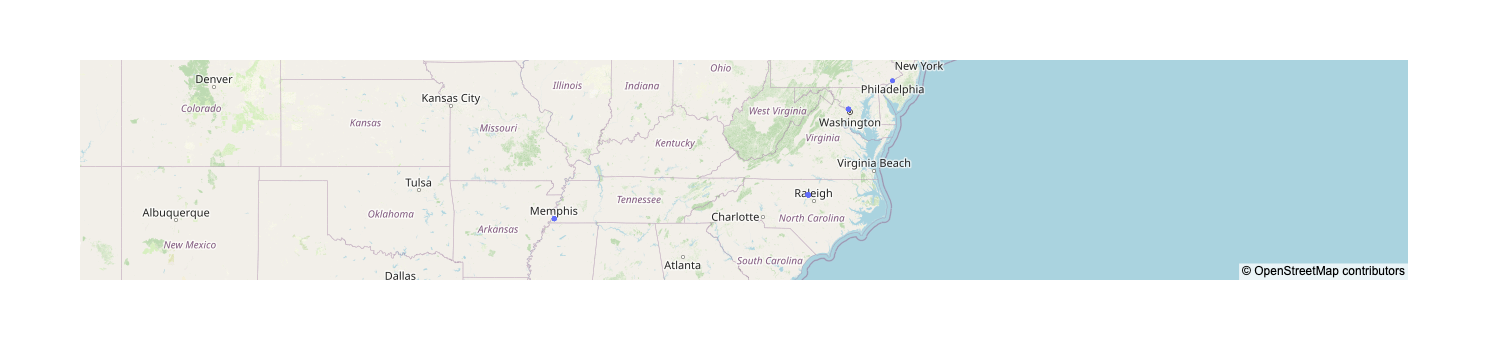

In [11]:
#Lets map this to see how the points show up
attempt1 = px.scatter_mapbox(employee, lat ='Lat', lon= 'Lon',zoom=4,hover_name='Name')
attempt1.update_layout(mapbox_style="open-street-map")

attempt1.show()

Only shows one instance per location, in the case of an actual employee map, we would need to show all employees, ESPECIALLY
if they're in the same city as someone else (thats the whole point of it)

In [12]:
#Create a function to easilyy grab the latitude and longitude coordinates
def get_coords(df,series):
    items = [i for i in df[series]]
    return items

In [13]:
longs = get_coords(employee,'Lon')
lats = get_coords(employee,'Lat')

In [14]:
#Ensure that all coordinate points are float values
#This will be important when we perform arithmetic calculations to increment/decrement the values in order
#to display them all on the map
def all_floats(listx):
    for element in range(len(listx)):
        listx[element]= float(listx[element])
    return listx

In [15]:
long = all_floats(longs)
lat = all_floats(lats)

In [16]:
#Use Counter to grab counts for each lat/long value; if any counts are > 1 then we know its a duplicate
#If it is a duplicate, that means (on the current map) it will only show the last occurence (Name) for a particular city
#ex: if there are 10 employees in Newark, NJ the 10th employee will be the only point on the map for Newark.
from collections import Counter

def count_items(listx):
    list_of_values = Counter(listx)
    return list_of_values

In [17]:
unique_long = count_items(long)
unique_lat= count_items(lat)

In [18]:
unique_long

Counter({-78.8945451903273: 119,
         -87.65373927069024: 17,
         -90.04702308243688: 11,
         -77.1188: 6,
         -122.276527318087: 4,
         -74.1707307241491: 2,
         -75.1839663338271: 1,
         -121.4950960992: 1,
         -81.6976984640103: 1,
         -71.0761046574631: 1})

In [19]:
unique_lat

Counter({35.9961585832096: 119,
         41.88593604168433: 17,
         35.14802113998383: 11,
         38.9866: 6,
         37.8052766811112: 4,
         40.7348962128706: 2,
         39.9523941860963: 1,
         38.5830913211928: 1,
         41.4991166140232: 1,
         42.3656454082563: 1})

In [20]:
#Keeping only the values with a count > 1 i.e. duplicates
def dups(data):
    duplicates = []
    for value,count in data.items():
        if count > 1:
            duplicates.append(value)
    return duplicates

In [21]:
lat_dups = dups(unique_lat)
long_dups = dups(unique_long)

In [22]:
lat_dups

[40.7348962128706,
 35.9961585832096,
 37.8052766811112,
 38.9866,
 41.88593604168433,
 35.14802113998383]

In [23]:
long_dups

[-74.1707307241491,
 -78.8945451903273,
 -122.276527318087,
 -77.1188,
 -87.65373927069024,
 -90.04702308243688]

In [24]:
# len = 6 --- 6 city,states having more than one person representing it
#isolate each value from the previous fn
long1, long2, long3, long4, long5, long6 = long_dups
lat1, lat2, lat3, lat4, lat5, lat6 = lat_dups

In [25]:
def find_position(original,dup_value): #grabbing the index of the duplicates as they appear in the original list
    position = []
    for index, item in enumerate(original): #original list
        if item == dup_value: #value in original is equal to value in dup list
                position.append(index)
    return position

In [26]:
city1 = find_position(long,long1)
city2 = find_position(long,long2)
city3 = find_position(long,long3)
city4 = find_position(long,long4)
city5 = find_position(long,long5)
city6 = find_position(long,long6)

In [27]:
#Just to show what the ouput looks like
city1

#Meaning there are two people who identify city1 as their home location: (1) at position 1 and (2) at position 10

[1, 10]

In [28]:
#Create values to increment/decrement the lat/lon values so that there is a slight variance between each point. This will allow all employees to show on the map,not just one

x = 0.0000030001
y = 0.0000040001

In [29]:
def loc(long_list,lat_list,city):
    global mid_ind
    mid_ind = len(city)//2-1
    
    if len(city) == 2:
        for element in range(1,len(city)): 
            for item in range(len(long_list)):
                if item == city[element]:
                    long_list[item]= long_list[city[element-1]] - x
                    lat_list[item]= lat_list[city[element-1]] - y
                         
    else:
        for element in range(1,mid_ind+1):
            for item in range(len(long_list)):
                if item == city[element]:
                    long_list[item]= long_list[city[element-1]] - x
                    lat_list[item]= lat_list[city[element-1]] - y
                         
        for element in range(mid_ind+1,len(city)): 
            for item in range(len(long_list)):
                if item == city[element]:
                    long_list[item]= long_list[city[element-1]] - x
                    lat_list[item]= lat_list[city[element-1]] - y
                        
    return long_list[item], lat_list[item]
                    
   

In [30]:
loc(long,lat,city1)
loc(long,lat,city2)
loc(long,lat,city3)
loc(long,lat,city4)
loc(long,lat,city5)
loc(long,lat,city6)

(-90.04705308343682, 35.147981138983845)

In [31]:
def adjust_again(list1,list2,city):
    for i in range(0,len(city),2):    
        list1[city[i]] = list1[city[i-1]] - 0.00001125
        list2[city[i]]=list2[city[i]]+ 0.0000142
        
    for k in range(0,len(city),3):
        list1[city[k]] = list1[city[k-1]] - 0.00001125
        list2[city[k]]=list2[city[k]]+ 0.0000142
        
    return list1[city[i]],list1[city[k]], list2[city[i]],list2[city[k]]

In [32]:
adjust_again(long,lat,city2)
adjust_again(long,lat,city3)
adjust_again(long,lat,city4)
adjust_again(long,lat,city5)
adjust_again(long,lat,city6)

(-90.04706133333683, -90.04706658313684, 35.14799533898385, 35.147999339083846)

In [34]:
#replace 'Lat' and 'Lon' values in original dataframe to reflect changes
employee['Lat']= [i for i in lat]
employee['Lon']= [i for i in long]

In [35]:
employee

Name          City State        Lat         Lon
0    Janet Robertson  Philadelphia    PA  39.952394  -75.183966
1          Lisa Gray        Newark    NJ  40.734896  -74.170731
2          Sam Smith    Sacramento    CA  38.583091 -121.495096
3     Robert Downing     Cleveland    OH  41.499117  -81.697698
4     Angela Stevens        Boston    MA  42.365645  -71.076105
..               ...           ...   ...        ...         ...
158      Dana Benson       Memphis    TN  35.148026  -90.047049
159       Jewel Moss       Memphis    TN  35.147993  -90.047044
160  Apollo Fontaine       Memphis    TN  35.148003  -90.047055
161    Frida Lillard       Memphis    TN  35.147999  -90.047067
162   Lillian Barker       Memphis    TN  35.147995  -90.047061

[163 rows x 5 columns]

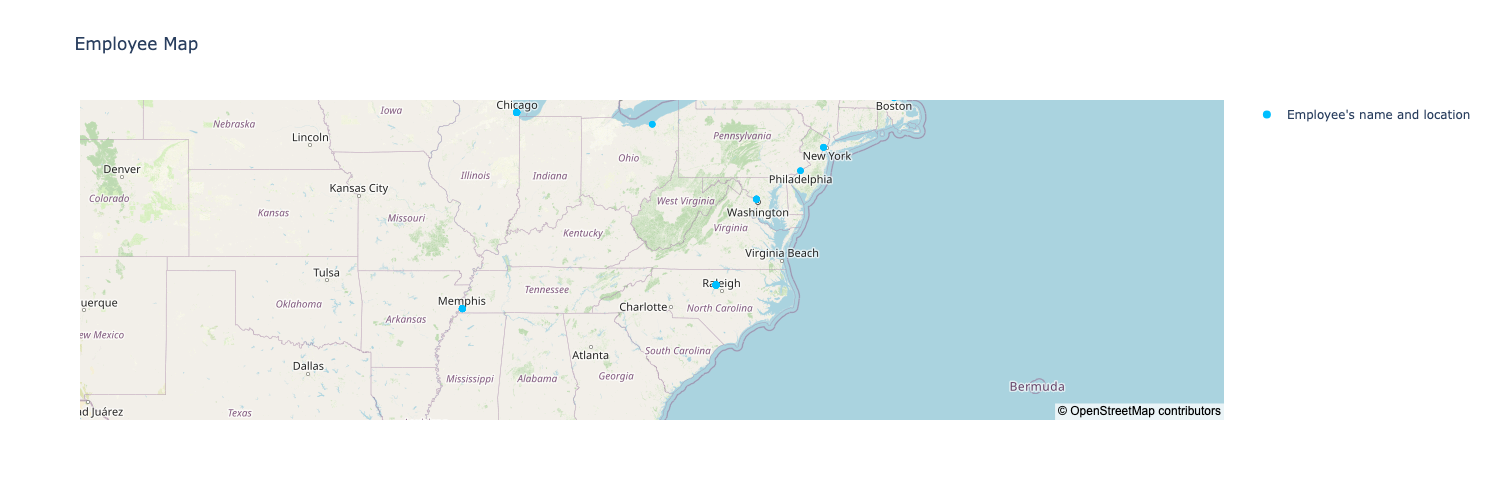

In [36]:
#Plot the findings
map1 = px.scatter_mapbox(employee, lat='Lat',lon='Lon',title='Employee Map',
                        hover_data={'Name':True,'City':True,'State':True,'Lat':False,'Lon':False}, zoom=4,height=500,width=800)

map1['data'][0]['showlegend']= True
map1['data'][0]['name'] = "Employee's name and location"

map1.update_traces(mode='markers', 
                 marker=go.scattermapbox.Marker(color='deepskyblue',size=8))

map1.update_layout(mapbox_style='open-street-map')

In [37]:
#Bring in DLH office information to add to the employee map
#This will be useful so employees will also know where the closest DLH is located
dlh = []
with open('DLH_loc.csv','r') as office:
    offices= csv.reader(office)
    for line in offices:
        dlh.append(line)

In [38]:
dlh_df = pd.DataFrame(dlh,columns=['DLH Office','Address','City','State','Zip'])

In [39]:
dlh_df

DLH Office                                     Address  \
0        Atlanta  3565 Piedmont Road NE Building 3 Suite 700   
1       Bethesda             6720B Rockledge Drive Suite 777   
2     Charleston                    5895 Core Road Suite 407   
3         Durham                 4505 Emperor Blvd. Ste. 400   
4        Orlando         3565 Avalon Park E. Blvd. Ste 1-258   
5  Silver Spring              8757 Georgia Avenue 12th Floor   

                City State     Zip  
0            Atlanta    GA   30305  
1           Bethesda    MD   20817  
2   North Charleston    SC   29406  
3             Durham    NC   27703  
4            Orlando    FL   32828  
5      Silver Spring    MD   20910

In [40]:
#Removing some whitespace
state = [i.strip() for i in dlh_df['State']]
city = [i.strip() for i in dlh_df['City']]

In [41]:
dlh_df['City']= city
dlh_df['State']= state

In [42]:
dlh_df

DLH Office                                     Address  \
0        Atlanta  3565 Piedmont Road NE Building 3 Suite 700   
1       Bethesda             6720B Rockledge Drive Suite 777   
2     Charleston                    5895 Core Road Suite 407   
3         Durham                 4505 Emperor Blvd. Ste. 400   
4        Orlando         3565 Avalon Park E. Blvd. Ste 1-258   
5  Silver Spring              8757 Georgia Avenue 12th Floor   

               City State     Zip  
0           Atlanta    GA   30305  
1          Bethesda    MD   20817  
2  North Charleston    SC   29406  
3            Durham    NC   27703  
4           Orlando    FL   32828  
5     Silver Spring    MD   20910

In [43]:
#Bring in city dataset, which contains latitude and longitude info for US Cities
# This will be mapped with the DLH office locations so that latitude and longitude coordinates can
#be assigned to each office, which is essential for the mapping in plotly
cities = []
with open('useful_datasets/us_cities/simplemaps_uscities_basicv1.76/uscities.csv','r') as c:
    city = csv.reader(c)
    for line in city:
        cities.append(line)

In [44]:
#cities

In [45]:
city_data = pd.DataFrame(cities[1:],columns=cities[0])

In [46]:
#Only keep the necessary columns for a merge
all_city=city_data[['city','state_id','lat','lng']]

In [47]:
all_city

city state_id      lat        lng
0                     New York       NY  40.6943   -73.9249
1                  Los Angeles       CA  34.1141  -118.4068
2                      Chicago       IL  41.8375   -87.6866
3                        Miami       FL  25.7840   -80.2101
4                       Dallas       TX  32.7935   -96.7667
...                        ...      ...      ...        ...
30839                Ironville       PA  40.6586   -78.2155
30840                  Newkirk       NM  35.0635  -104.2715
30841           Falcon Village       TX  26.5652   -99.1341
30842             Hidden Lakes       OH  40.5479   -82.7632
30843  El Monte Mobile Village       CA  36.5471  -119.4251

[30844 rows x 4 columns]

In [48]:
#Do some cleaning to prepare for merge
all_city['City']= all_city['city']

/var/folders/46/c7pkcp2d2tx6jtxpk_cb30d80000gn/T/ipykernel_9146/230897144.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
city = all_city.drop(columns='city')

In [50]:
city['State']= city['state_id']

In [51]:
cities = city.drop(columns='state_id')

In [52]:
#Some cities are present in multiple states so we'll need to merge on State first and then City
dlh_offices = dlh_df.merge(cities,how='left', on=['State','City'])

In [53]:
dlh_offices

DLH Office                                     Address  \
0        Atlanta  3565 Piedmont Road NE Building 3 Suite 700   
1       Bethesda             6720B Rockledge Drive Suite 777   
2     Charleston                    5895 Core Road Suite 407   
3         Durham                 4505 Emperor Blvd. Ste. 400   
4        Orlando         3565 Avalon Park E. Blvd. Ste 1-258   
5  Silver Spring              8757 Georgia Avenue 12th Floor   

               City State     Zip      lat       lng  
0           Atlanta    GA   30305  33.7628  -84.4220  
1          Bethesda    MD   20817  38.9866  -77.1188  
2  North Charleston    SC   29406  32.9067  -80.0722  
3            Durham    NC   27703  35.9792  -78.9022  
4           Orlando    FL   32828  28.4773  -81.3370  
5     Silver Spring    MD   20910  39.0028  -77.0207

In [54]:
#Ensure that latitude and longitude values are floats
dlh_offices['lat'] = dlh_offices['lat'].astype(float)
dlh_offices['lng'] = dlh_offices['lng'].astype(float)

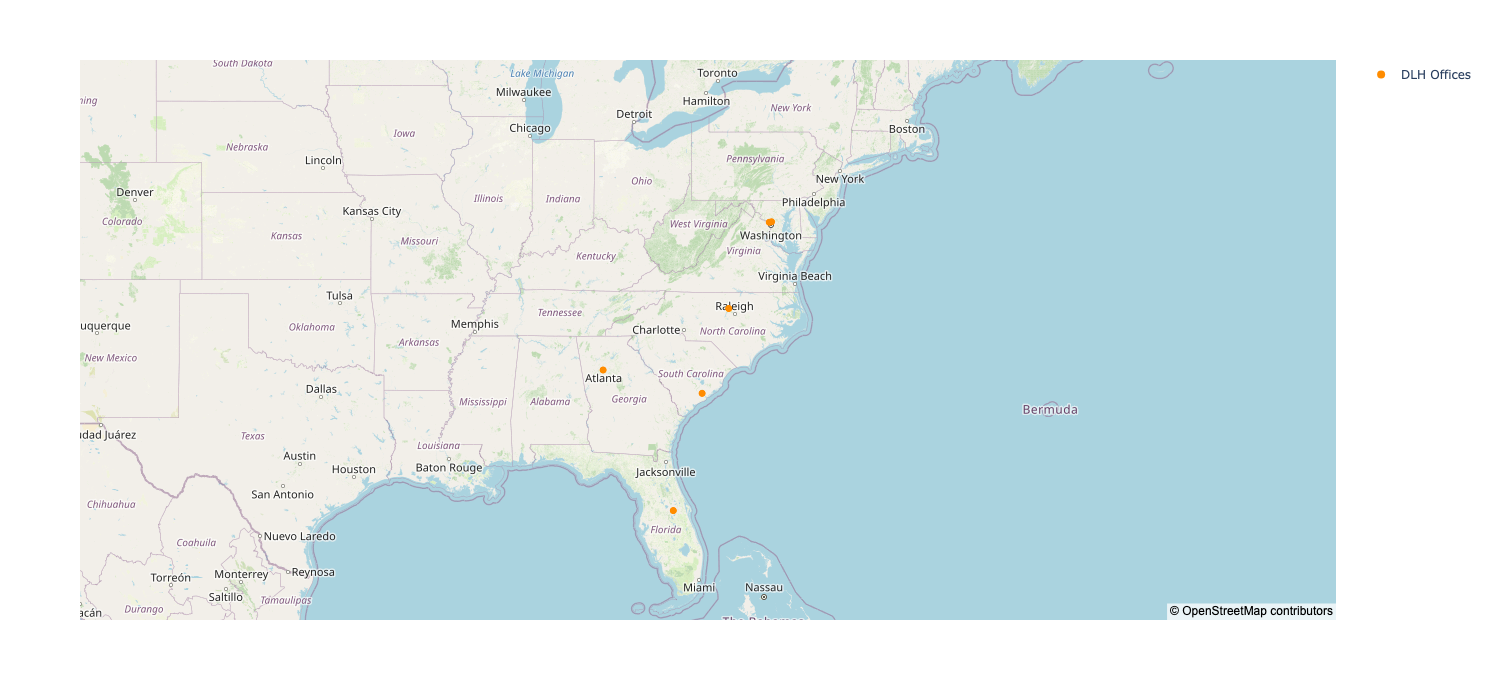

In [55]:
#Now we can plot the DLH office locations on a map. We'll then merge maps to have one map containing employee locations and DLH office locations
dlh_map = px.scatter_mapbox(dlh_offices, lat='lat',lon='lng',
                        hover_data={'DLH Office':True,'lat':False,'Address':True,'lng':False,'City':False, 'State':True},
                        zoom=4,height=700)

dlh_map['data'][0]['showlegend']= True
dlh_map['data'][0]['name'] = "DLH Offices"
dlh_map.update_traces(mode='markers', 
                  marker=go.scattermapbox.Marker(color='darkorange',size=8))

dlh_map.update_layout(mapbox_style="open-street-map")

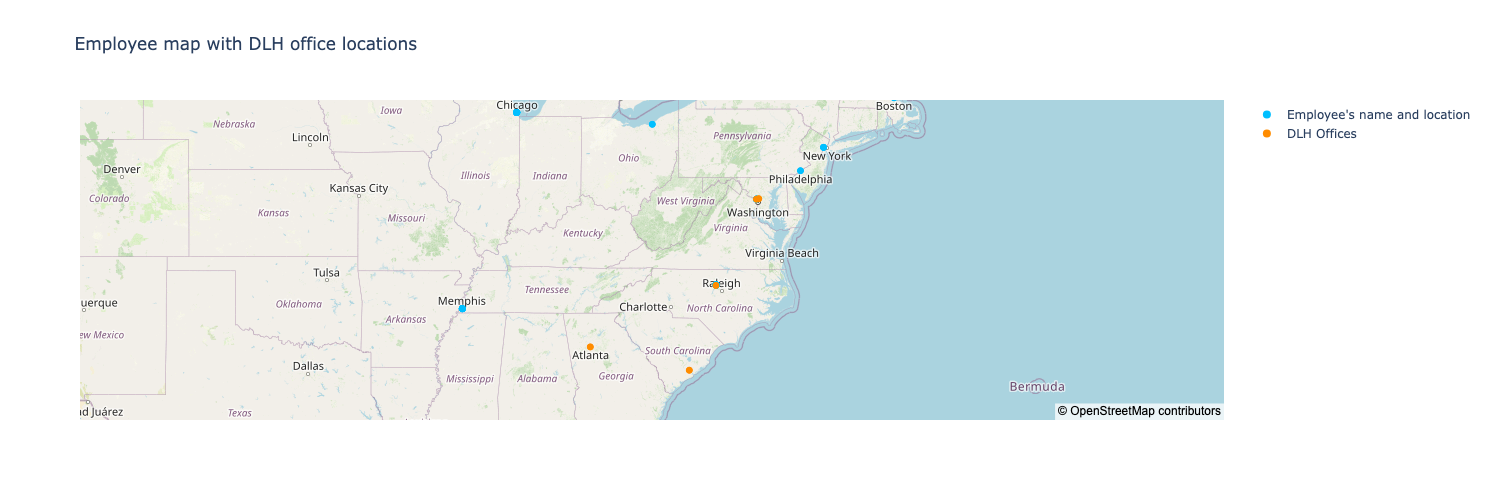

In [56]:
#combine both maps
map1.add_trace(dlh_map.data[0])
map1.update_layout(title="Employee map with DLH office locations")

As an employer, if you were interested in looking at the distribution of employees and their location, to for example plan annual in-person events, the following would be helpful in that:

In [57]:
states = dataframe['State'].value_counts().index
counts = dataframe['State'].value_counts()

In [58]:
state_counts = pd.DataFrame({'Frequency':counts},index=states)

In [59]:
state_counts

Frequency
State           
NC           119
IL            17
TN            11
MD             6
CA             5
NJ             2
PA             1
OH             1
MA             1

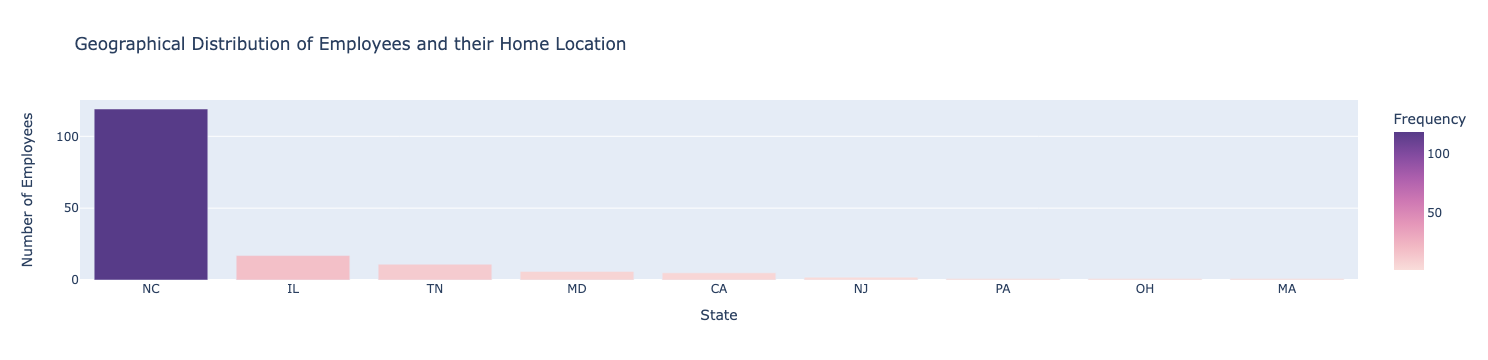

In [60]:
geo_employ = px.bar(state_counts,y='Frequency', color = 'Frequency',color_continuous_scale= px.colors.sequential.Purpor,
      title='Geographical Distribution of Employees and their Home Location')
geo_employ.update_layout(yaxis_title= 'Number of Employees')